In [1]:
import pandas as pd
filename='C:/Users/mithu/OneDrive/Pictures/AirQualityUCI.csv'
df=pd.read_csv(filename,header=0,sep=';')

In [2]:
df=df.dropna(how='all')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",NaN,NaN
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN


In [3]:
df1=df[['Date','Time','PT08.S1(CO)']]
df1=df1.rename(columns={'PT08.S1(CO)':'y'})
df1

,Date,Time,y
0,10/03/2004,18.00.00,1360.0
1,10/03/2004,19.00.00,1292.0
2,10/03/2004,20.00.00,1402.0
3,10/03/2004,21.00.00,1376.0
4,10/03/2004,22.00.00,1272.0
...,...,...,...
9352,04/04/2005,10.00.00,1314.0
9353,04/04/2005,11.00.00,1163.0
9354,04/04/2005,12.00.00,1142.0
9355,04/04/2005,13.00.00,1003.0


In [4]:
df1.dtypes

Date     object
Time     object
y       float64
dtype: object

In [5]:
from datetime import date,time,datetime
res=[]
for i in range(len(df1)):
    x1=df1['Date'].iloc[i].split('/')
    x2=df1['Time'].iloc[i].split('.')
    res.append(datetime(year=int(x1[2]),month=int(x1[1]),day=int(x1[0]),hour=int(x2[0]),minute=int(x2[1]),second=int(x2[2])))

df1['datetime']=res
df1

,Date,Time,y,datetime
0,10/03/2004,18.00.00,1360.0,2004-03-10 18:00:00
1,10/03/2004,19.00.00,1292.0,2004-03-10 19:00:00
2,10/03/2004,20.00.00,1402.0,2004-03-10 20:00:00
3,10/03/2004,21.00.00,1376.0,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1272.0,2004-03-10 22:00:00
...,...,...,...,...
9352,04/04/2005,10.00.00,1314.0,2005-04-04 10:00:00
9353,04/04/2005,11.00.00,1163.0,2005-04-04 11:00:00
9354,04/04/2005,12.00.00,1142.0,2005-04-04 12:00:00
9355,04/04/2005,13.00.00,1003.0,2005-04-04 13:00:00


In [6]:
df2=df1[['datetime','y']]
df2=df2.set_index('datetime')
df2

,y
datetime,
2004-03-10 18:00:00,1360.0
2004-03-10 19:00:00,1292.0
2004-03-10 20:00:00,1402.0
2004-03-10 21:00:00,1376.0
2004-03-10 22:00:00,1272.0
...,...
2005-04-04 10:00:00,1314.0
2005-04-04 11:00:00,1163.0
2005-04-04 12:00:00,1142.0


<AxesSubplot:xlabel='datetime'>

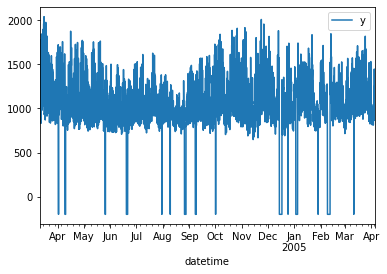

In [7]:
df2.plot()

In [8]:
n=len(df2)
df_train,df_test=df2.iloc[:int(n*.8),:],df2.iloc[int(n*.8):,:]
print(n,df_train.shape,df_test.shape)

9357 (7485, 1) (1872, 1)


In [9]:
import statsmodels.api as sm

In [23]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train,lags=1)
model_fit=model.fit()
yhat=model_fit.predict(df_test.index[0],df_test.index[-1])
print(yhat)

2005-01-16 15:00:00     838.289904
2005-01-16 16:00:00     855.980942
2005-01-16 17:00:00     872.205638
2005-01-16 18:00:00     887.085532
2005-01-16 19:00:00     900.732087
                          ...     
2005-04-04 10:00:00    1051.727682
2005-04-04 11:00:00    1051.727682
2005-04-04 12:00:00    1051.727682
2005-04-04 13:00:00    1051.727682
2005-04-04 14:00:00    1051.727682
Freq: H, Length: 1872, dtype: float64


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [21]:
df_test.index[0]


Timestamp('2005-01-16 15:00:00')

In [24]:
yhat[0]

838.2899042898098

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train,order=(0,0,1))
model_fit=model.fit()
yhat=model_fit.predict(df_test.index[0],df_test.index[-1])
print(yhat)

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2005-01-16 15:00:00     895.162939
2005-01-16 16:00:00    1052.569420
2005-01-16 17:00:00    1052.569420
2005-01-16 18:00:00    1052.569420
2005-01-16 19:00:00    1052.569420
                          ...     
2005-04-04 10:00:00    1052.569420
2005-04-04 11:00:00    1052.569420
2005-04-04 12:00:00    1052.569420
2005-04-04 13:00:00    1052.569420
2005-04-04 14:00:00    1052.569420
Freq: H, Name: predicted_mean, Length: 1872, dtype: float64


In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
Error=defaultdict(int)
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        for k in [0,1,2]:
            model=ARIMA(df_train,order=(i,j,k))
            model_fit=model.fit()
            yhat=model_fit.predict(df_test.index[0],df_test.index[-1])
            Error[(i,j,k)]=mean_absolute_error(yhat,df_test.y.values)
print(Error)

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\b

defaultdict(<class 'int'>, {(0, 0, 0): 212.9029871898854, (0, 0, 1): 212.82197149043418, (0, 0, 2): 212.7897815101939, (0, 1, 0): 312.27884615384613, (0, 1, 1): 316.8575988599071, (0, 1, 2): 316.17588209143116, (0, 2, 0): 44231.18162393164, (0, 2, 1): 375.6907096546397, (0, 2, 2): 378.0911382685931, (0, 3, 0): 48014258.51495727, (0, 3, 1): 55518.12620165598, (0, 3, 2): 32325.27786182128, (1, 0, 0): 212.34971023940065, (1, 0, 1): 212.3290663432071, (1, 0, 2): 212.33269076619962, (1, 1, 0): 316.63520224064024, (1, 1, 1): 316.70189027279184, (1, 1, 2): 212.7994550328421, (1, 2, 0): 21532.54550958041, (1, 2, 1): 385.0008615164348, (1, 2, 2): 377.8283229339437, (1, 3, 0): 17230244.70333027, (1, 3, 1): 24614.000447029503, (1, 3, 2): 210235.96618752414, (2, 0, 0): 212.33112612074692, (2, 0, 1): 212.33088352106006, (2, 0, 2): 212.58999578576456, (2, 1, 0): 316.06438572191695, (2, 1, 1): 213.11060170612546, (2, 1, 2): 219.0578318979459, (2, 2, 0): 17575.442903670944, (2, 2, 1): 377.450473231429

In [39]:
mean_absolute_error(yhat,df_test.y.values)

212.9029871898854

In [44]:
sorted(Error,key=lambda x:Error[x])

[(1, 0, 1),
 (3, 0, 0),
 (2, 0, 1),
 (2, 0, 0),
 (3, 0, 1),
 (1, 0, 2),
 (1, 0, 0),
 (3, 0, 2),
 (2, 0, 2),
 (0, 0, 2),
 (1, 1, 2),
 (0, 0, 1),
 (0, 0, 0),
 (2, 1, 1),
 (3, 1, 1),
 (3, 1, 2),
 (2, 1, 2),
 (0, 1, 0),
 (3, 1, 0),
 (2, 1, 0),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (0, 1, 1),
 (3, 2, 1),
 (0, 2, 1),
 (2, 2, 1),
 (1, 2, 2),
 (0, 2, 2),
 (2, 2, 2),
 (3, 2, 2),
 (1, 2, 1),
 (3, 2, 0),
 (2, 3, 2),
 (3, 3, 1),
 (2, 2, 0),
 (2, 3, 1),
 (3, 3, 2),
 (1, 2, 0),
 (1, 3, 1),
 (0, 3, 2),
 (0, 2, 0),
 (0, 3, 1),
 (1, 3, 2),
 (3, 3, 0),
 (2, 3, 0),
 (1, 3, 0),
 (0, 3, 0)]

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_train,order=(1,0,1),season_order=(0,0,1,3))
model_fit=model.fit()
yhat=model_fit.predict(df_test.index[0],df_test.index[-1])
print(mean_absolute_error(yhat,df_test.y.values))

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


1006.0479459187062


In [57]:
exog=df['CO(GT)'].iloc[:len(df_train)]
model=SARIMAX(df_train,exog=np.array(exog.values).reshape(-1,1),order=(1,0,1),season_order=(0,0,1,3))
model_fit=model.fit(disp=False)
yhat=model_fit.predict(df_test.index[0],df_test.index[-1])
print(mean_absolute_error(yhat,df_test.y.values))

<IPython.core.display.Javascript object>

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [56]:
np.array(exog.values).shape
#df_train.shape


<IPython.core.display.Javascript object>

(7485,)

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
model=SimpleExpSmoothing(df_train)
model_fit=model.fit()


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [61]:
model=ExponentialSmoothing(df_train)
model_fit=model.fit()

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [62]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model=ETSModel(df_train)
fit=model.fit(maxiter=1000)


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


ValueError: endog must be 1-dimensional

In [64]:
df_train.index = pd.to_datetime(df_train.index)
df_train

,y
datetime,
2004-03-10 18:00:00,1360.0
2004-03-10 19:00:00,1292.0
2004-03-10 20:00:00,1402.0
2004-03-10 21:00:00,1376.0
2004-03-10 22:00:00,1272.0
...,...
2005-01-16 10:00:00,841.0
2005-01-16 11:00:00,850.0
2005-01-16 12:00:00,831.0


<AxesSubplot:xlabel='datetime'>

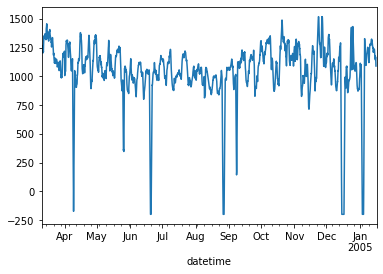

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
final=seasonal_decompose(df_train['y'],model='additive')
final.trend.plot()

<AxesSubplot:xlabel='datetime'>

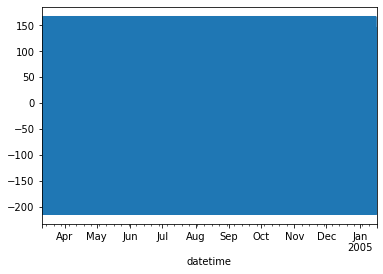

In [67]:
final.seasonal.plot()

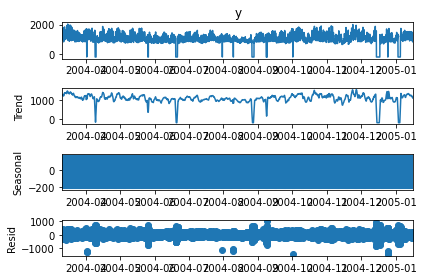

In [68]:
fig=final.plot()

In [86]:
fit1 = ETSModel(df_train['y'], seasonal_periods=7, trend='add', seasonal=None, damped_trend=True).fit()
fcst = fit1.predict(start=df_test.index[0], end=df_test.index[-1])


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [87]:
fcst

2005-01-16 15:00:00    818.996920
2005-01-16 16:00:00    818.990697
2005-01-16 17:00:00    818.985718
2005-01-16 18:00:00    818.981736
2005-01-16 19:00:00    818.978549
                          ...    
2005-04-04 10:00:00    818.965804
2005-04-04 11:00:00    818.965804
2005-04-04 12:00:00    818.965804
2005-04-04 13:00:00    818.965804
2005-04-04 14:00:00    818.965804
Freq: H, Length: 1872, dtype: float64

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [110]:
def create_data(dataset,look_back=3):
    res=[]
    y=[]
    for i in range(len(dataset)-look_back-1):
        res.append(list(dataset[i:i+look_back,0]))
        y.append(dataset[i+look_back,0])
    return res,y
Value=df_train.values
X,y=create_data(Value,look_back=3)
print(X,y)

[[1360.0, 1292.0, 1402.0], [1292.0, 1402.0, 1376.0], [1402.0, 1376.0, 1272.0], [1376.0, 1272.0, 1197.0], [1272.0, 1197.0, 1185.0], [1197.0, 1185.0, 1136.0], [1185.0, 1136.0, 1094.0], [1136.0, 1094.0, 1010.0], [1094.0, 1010.0, 1011.0], [1010.0, 1011.0, 1066.0], [1011.0, 1066.0, 1052.0], [1066.0, 1052.0, 1144.0], [1052.0, 1144.0, 1333.0], [1144.0, 1333.0, 1351.0], [1333.0, 1351.0, 1233.0], [1351.0, 1233.0, 1179.0], [1233.0, 1179.0, 1236.0], [1179.0, 1236.0, 1286.0], [1236.0, 1286.0, 1371.0], [1286.0, 1371.0, 1310.0], [1371.0, 1310.0, 1292.0], [1310.0, 1292.0, 1383.0], [1292.0, 1383.0, 1581.0], [1383.0, 1581.0, 1776.0], [1581.0, 1776.0, 1640.0], [1776.0, 1640.0, 1313.0], [1640.0, 1313.0, 965.0], [1313.0, 965.0, 913.0], [965.0, 913.0, 1080.0], [913.0, 1080.0, 1044.0], [1080.0, 1044.0, 988.0], [1044.0, 988.0, 889.0], [988.0, 889.0, 831.0], [889.0, 831.0, 847.0], [831.0, 847.0, 927.0], [847.0, 927.0, 1091.0], [927.0, 1091.0, 1587.0], [1091.0, 1587.0, 1545.0], [1587.0, 1545.0, 1350.0], [1545.

In [115]:
X=np.array(X).reshape(-1,3)
y=np.array(y).reshape(-1,1)
X

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[1360., 1292., 1402.],
       [1292., 1402., 1376.],
       [1402., 1376., 1272.],
       ...,
       [ 939.,  946.,  841.],
       [ 946.,  841.,  850.],
       [ 841.,  850.,  831.]])

In [129]:
trainX=np.reshape(X,(X.shape[0],X.shape[1],1))
trainy=np.reshape(y,(-1,1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
look_back=3
model=Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainy,epochs=5,batch_size=1,verbose=2)


Epoch 1/5
7481/7481 - 12s - loss: 1193864.8750
Epoch 2/5
7481/7481 - 10s - loss: 1149295.0000
Epoch 3/5
7481/7481 - 11s - loss: 1105957.8750
Epoch 4/5
7481/7481 - 11s - loss: 1063628.5000
Epoch 5/5
7481/7481 - 10s - loss: 1022085.6875


In [131]:
trainPredict = model.predict(trainX)
print(mean_absolute_error(trainPredict,trainy))

966.6626201604653


In [132]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [135]:
model.evaluate(trainX,trainy,verbose=2)

234/234 - 0s - loss: 1001648.6250


1001648.625